# Exploratory Data Analysis 

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("dataset1_filtering_done.csv")

In [6]:
df.head()

,Unnamed: 0,Category,Description,carbs,protein,fat,fiber,calories,goal_tag,diet_type
0,0,milk,"milk, nfs",4.87,3.34,1.99,0.0,50.75,weight_loss,veg
1,1,milk,"milk, whole",4.67,3.28,3.20,0.0,60.60,weight_loss,veg
2,2,milk,"milk, low sodium, whole",4.46,3.10,3.46,0.0,61.38,weight_loss,veg
3,3,milk,"milk, calcium fortified, whole",4.67,3.28,3.20,0.0,60.60,weight_loss,veg
4,4,milk,"milk, calcium fortified, low fat (1%)",5.19,3.38,0.95,0.0,42.83,weight_loss,veg


## Statistical Properties

In [8]:
df.describe()

,Unnamed: 0,carbs,protein,fat,fiber,calories
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,3302.500000,21.728642,8.585663,9.082767,1.788934,203.002125
std,1907.132271,22.345535,8.315093,11.300060,2.622122,146.773954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1651.250000,5.632500,2.290000,1.900000,0.200000,87.960000
50%,3302.500000,14.425000,6.175000,5.690000,1.100000,169.600000
75%,4953.750000,28.167500,12.100000,12.767500,2.300000,281.975000
max,6605.000000,100.000000,85.000000,100.000000,46.200000,900.260000


## Macro Distribution Overview

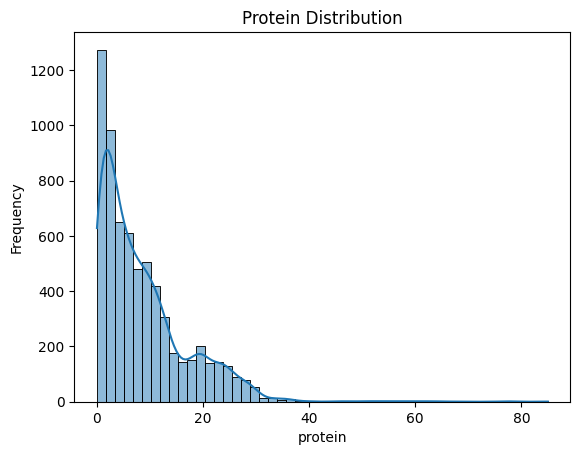

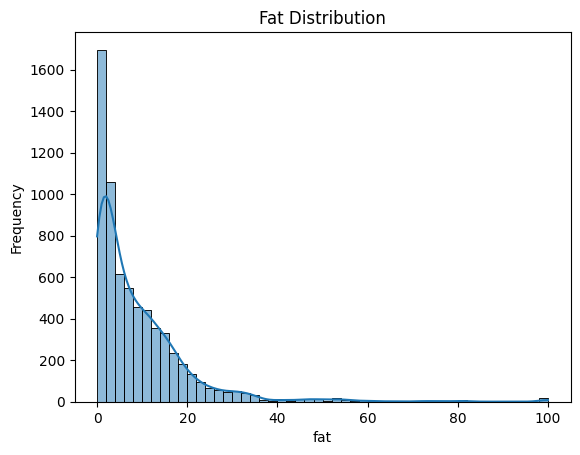

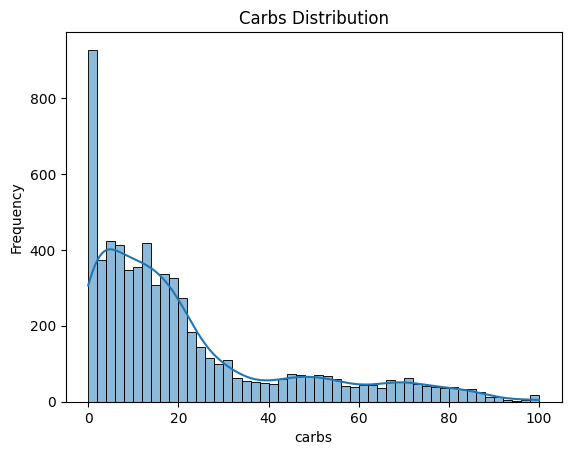

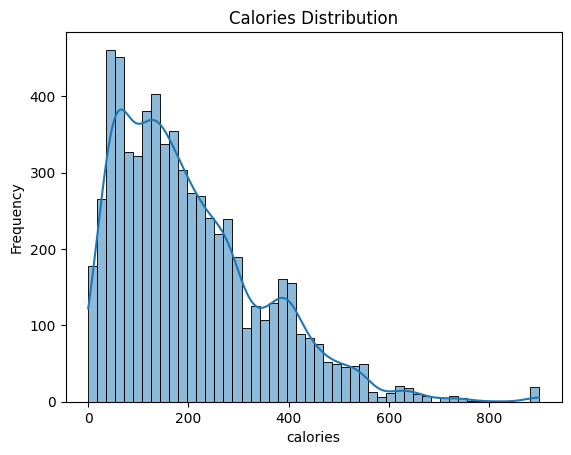

In [10]:
for col in ["protein","fat","carbs","calories"]:
    sns.histplot(df[col],bins=50,kde=True)
    plt.title(f"{col.capitalize()} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## Macro Balace per Food Category
Mean protein , Carbs , Fat per Category or goal_tag

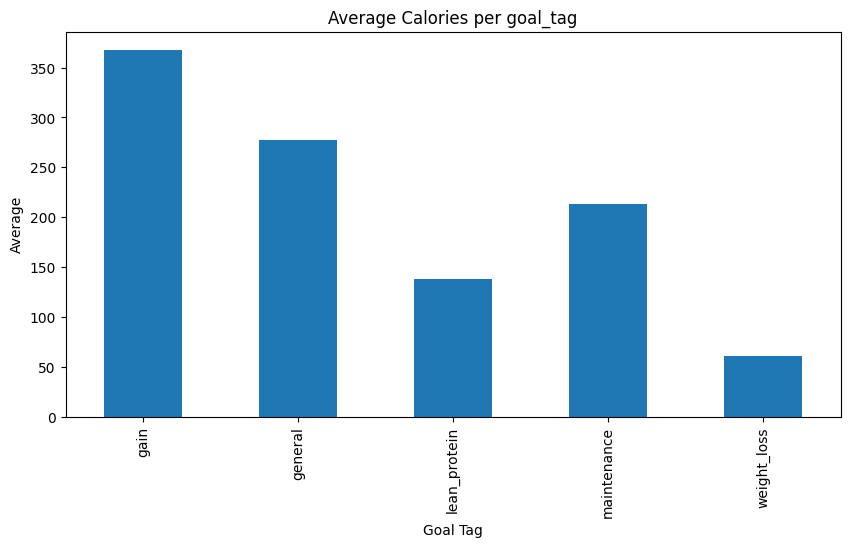

In [12]:
df.groupby("goal_tag")["calories"].mean().plot(kind="bar",figsize=(10,5))
plt.title("Average Calories per goal_tag")
plt.ylabel("Average")
plt.xlabel("Goal Tag")
plt.show()

### Summary: -
gain has heights average calories food falling under this category can be a good source to get good amount of cabohydrates and protein for people who want to gain weight and build muscle at the same time

weight_loss has the lowest average calories good food source for people who want to loos weight and eat in a caloric deficit

lean protien average calories are on the lower side, perfect for people who want to just build muscle without consuming a lot of calories

maintenance and general and between gain and weight loss perfect for a balanced diet for people who want to maintain weight

## Correlation Heatmap

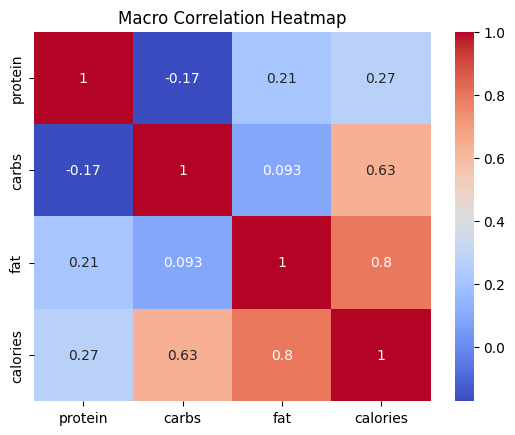

In [15]:
sns.heatmap(df[["protein","carbs","fat","calories"]].corr() , annot=True, cmap="coolwarm")
plt.title("Macro Correlation Heatmap")
plt.show()

### Summary : -
Carbohydrates and fat have a very high correlation indicating that there are a lot of items in the dataset that are high in both fats and carbs making them perfect for gaining

Calories and fat also have a high correlation indicating that fats are generally high in calories and need to be added to diet in moderation for gaining

Calories and Protein have low correlation indicating that there are a lot of lean protein options

Secondly if one wants to gain muscle he/she need to add  protein sources to their diet . Since consumtion of only fats and carbohydrates in large quantities will only lead to body fat gain 

## Lean Protein food options

In [18]:
## Top Lean Protein Food option NON VEG
df[(df["goal_tag"] == "lean_protein") & (df["diet_type"] == "non_veg")].value_counts().head(20)

Unnamed: 0  Category            Description                                                              carbs  protein  fat    fiber  calories  goal_tag      diet_type
533         pork                pork, tenderloin, cooked, ns as to cooking method                        0.00   26.90    4.33   0.0    146.57    lean_protein  non_veg      1
535         pork                pork, tenderloin, braised                                                0.00   27.24    2.80   0.0    134.16    lean_protein  non_veg      1
536         pork                pork, tenderloin, baked                                                  0.00   26.90    4.33   0.0    146.57    lean_protein  non_veg      1
549         ham                 ham, smoked or cured, cooked, lean only eaten                            1.05   21.64    4.95   0.0    135.31    lean_protein  non_veg      1
553         ham                 ham, smoked or cured, canned, lean only eaten                            1.00   17.80    4.31   0.0    

In [19]:
## Top Lean Protein Food option VEG
df[(df["goal_tag"] == "lean_protein") & (df["diet_type"] == "veg")].value_counts().head(50)

Unnamed: 0  Category             Description                                        carbs  protein  fat    fiber  calories  goal_tag      diet_type
339         cheese               cheese, mozzarella, nonfat or fat free             3.50   31.70    0.00   1.8    140.80    lean_protein  veg          1
352         cheese               cheese, swiss, nonfat or fat free                  3.40   28.40    0.00   0.0    127.20    lean_protein  veg          1
379         cheese               cheese, american, nonfat or fat free               10.53  21.05    0.00   0.0    126.32    lean_protein  veg          1
382         cream cheese spread  cream cheese spread, fat free                      7.66   15.69    1.00   0.0    102.40    lean_protein  veg          1
913         sweetbreads          sweetbreads, cooked                                0.00   22.48    3.08   0.0    117.64    lean_protein  veg          1
942         pastrami             pastrami, made from any kind of meat, reduced fat  0.6

### Summary : -
As evident from above cells lean protein options for  non veg consumers is immense as compared to vegetarians. Therefore it is almost every time recommended for vegetarians to supplement protein using whey protein isolate